# Binomial Distribution

### Exercise: Checking If a Random Variable Follows a Binomial Distribution

In this exercise, we will practice how to verify if a random variable follows a binomial distribution. We will also create a random variable using scipy.stats and plot the distribution. This will be a mostly conceptual exercise.

Here, we will check if the random variable, Z: number of defective auto parts in a 12-box pack, follows a binomial distribution (remember that we consider 4% of the auto parts are defective). Follow these steps to complete this exercise:

1.Import NumPy, Matplotlib, and scipy.stats following the usual conventions:

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

***

2.Try to conceptually check if Z fulfills the properties given for a binomial random variable:

**Requirements for Binomial Distribution**

- Multiple trials         ======> *multiple auto parts (in a 12-box pack)*

- Two outcomes            ======> *defective or not*

- P(success) is constant  ======> *P(defectiveness) is constant*

- Independent trials      ======> *Defective auto parts are independent (no relationship between each other)*

***

3.Determine the p and n parameters for the distributions of this variable, that is, p = 0.04 and n = 12.

In [2]:
n = 12
p = 0.04

***

4.Use the theoretical formula with the former parameters to get the exact theoretical probability of getting exactly one defective piece per box (using x = 1): 

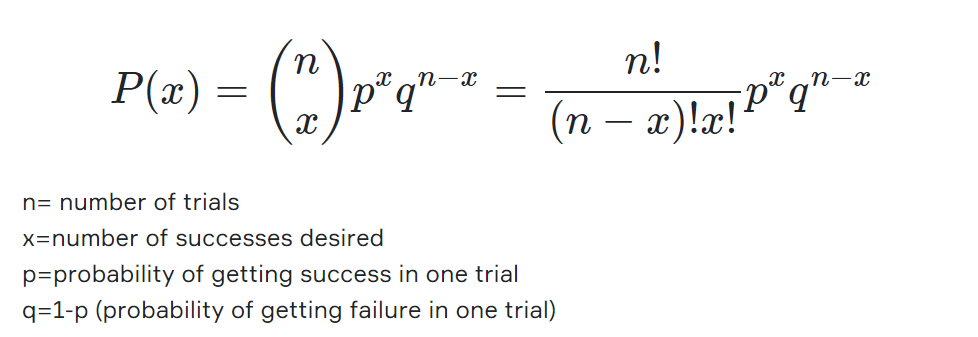

In [ ]:
P(Z=1) = (12! / (12-1)! * 1!) * 0.04 * (1 - 0.04) ** 12 - 1

In [3]:
def factorial(n):  
    return 1 if (n==1 or n==0) else n * factorial(n - 1); 

In [4]:
P_Z = (factorial(12) / factorial(11)) * 0.04 * (1-0.04) ** 11

In [5]:
P_Z

0.3063548786648836

***

5.Use the scipy.stats module to produce an instance of the Z random variable. Name it Z_rv:

In [6]:
Z_rv = stats.binom(n, p)

***

6.Plot the probability mass function of Z:

In [7]:
Z_possible_values = np.arange(0, n+1)
Z_possible_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [8]:
Z_probabilities = Z_rv.pmf(Z_possible_values)
# Z_probabilities = stats.binom(n=12, p=0.04).pmf(np.arange(0, n+1))

Z_probabilities

array([6.12709757e-01, 3.06354879e-01, 7.02063264e-02, 9.75087866e-03,
       9.14144874e-04, 6.09429916e-05, 2.96250654e-06, 1.05803805e-07,
       2.75530742e-09, 5.10242115e-11, 6.37802643e-13, 4.83183821e-15,
       1.67772160e-17])

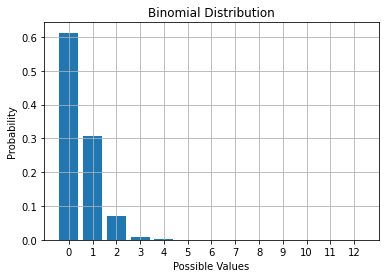

In [9]:
fix, ax = plt.subplots()

ax.bar(Z_possible_values, Z_probabilities)

ax.set_title('Binomial Distribution')
ax.set_xticks(Z_possible_values)

ax.set_xlabel('Possible Values')
ax.set_ylabel('Probability')

ax.grid();

***

# Normal Distribution

### Exercise: Using the Normal Distribution in Education

In this exercise, we'll use a normal distribution object from scipy.stats and the cdf and its inverse, ppf, to answer questions about education.

In psychometrics and education, it is a well-known fact that many variables relevant to education policy are normally distributed. For instance, scores in standardized mathematics tests follow a normal distribution. In this exercise, we'll explore this phenomenon: in a certain country, high school students take a standardized mathematics test whose scores follow a normal distribution with the following parameters: mean = 100, standard deviation = 15. Follow these steps to complete this exercise:

1.Import NumPy, Matplotlib, and scipy.stats following the usual conventions:

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

2.Use the scipy.stats module to produce an instance of a normally distributed random variable, named X_rv, with mean = 100 and standard deviation = 15:

In [11]:
x_mean = 100
x_std = 15

In [12]:
# create the random variable

X_rv = stats.norm(loc=x_mean, scale=x_std)
X_rv

3.Plot the probability distribution of X:

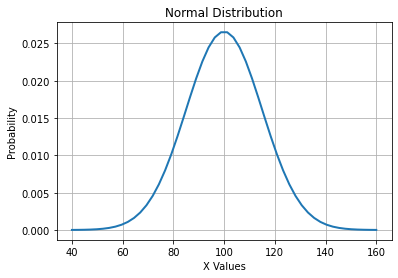

In [13]:
x_values = np.linspace(x_mean - 4 * x_std, x_mean + 4 * x_std)
y_values = X_rv.pdf(x_values)

fix, ax = plt.subplots()

ax.plot(x_values, y_values, lw=2)

ax.set_title('Normal Distribution')

ax.set_xlabel('X Values')
ax.set_ylabel('Probability')

ax.grid();

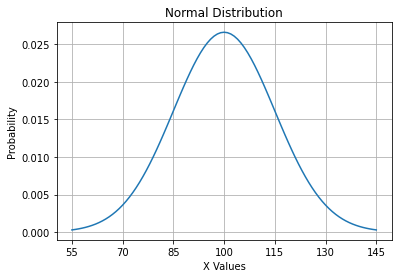

In [14]:
# alternative

x_values = np.arange(x_mean-3*x_std, (x_mean+3*x_std)+1)
y_values = X_rv.pdf(x_values)

fix, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set_title('Normal Distribution')
ax.set_xticks(np.arange(x_mean-3*x_std, (x_mean+3*x_std)+1, x_std))

ax.set_xlabel('X Values')
ax.set_ylabel('Probability')

ax.grid();

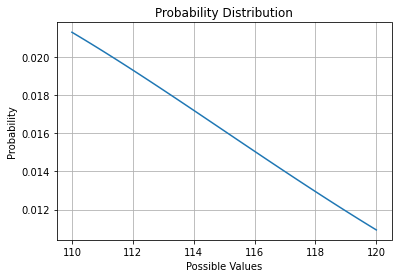

In [15]:
x_values = np.linspace(x_mean-5+x_std, x_mean+5+x_std)
y_values = X_rv.pdf(x_values)

fix, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set_title('Probability Distribution')

ax.set_xlabel('Possible Values')
ax.set_ylabel('Probability')

ax.grid();

4.The Ministry of Education has decided that the minimum score for someone to be considered competent in mathematics is 80. Use the cdf method to calculate the proportion of students that will get a score above that score:

In [ ]:
P(X>80)

In [16]:
x_mean = 100
x_std = 15

In [17]:
1 - stats.norm.cdf(80, x_mean, x_std)

0.9087887802741321

In [18]:
# alternative solution

Prob_X_gt_80 = X_rv.cdf(np.Inf) - X_rv.cdf(80)

print(f'Prob(X >= 80): {Prob_X_gt_80:0.5f} (or {100*Prob_X_gt_80:0.2f}%)')

Prob(X >= 80): 0.90879 (or 90.88%)


5.A very selective university wants to set very high standards for high school students that are admitted to their programs. The policy of the university is to only admit students with mathematics scores in the top 2% of the population. Use the ppf method (which is essentially the inverse function of the cdf method) with an argument of 1 - 0.02 = 0.98 to get the cut-off score for admission:

In [19]:
q = 1 - 0.02
q

0.98

In [20]:
stats.norm.ppf(q, loc=x_mean, scale=x_std)

130.80623365947733

In [21]:
# alternative solution

proportion_of_admitted = 0.02
cut_off = X_rv.ppf(1-proportion_of_admitted)

print(f'To admit the top {100*proportion_of_admitted:0.0f}%, the cut-off score should be {cut_off:0.1f}')

To admit the top 2%, the cut-off score should be 130.8


In this exercise, we used a normal distribution and the cdf and ppf methods to answer real-world questions about education policy.